In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import scipy
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Set the style
sns.set_style("white")

In [2]:
# Create dataframe and keep only the columns we need. Rename the columns
df_raw = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv',
                        header=4, # Sets the header
                        skipfooter = 3,
                        warn_bad_lines = True,
                        skip_blank_lines = True,
                        engine='python')
df = df_raw.copy()
df = df.set_index('City')
df.drop(columns=['Rape\n(revised\ndefinition)1', 'Arson3'], inplace=True)
df.columns = ['Population', 'Violent_crime', 'Murder', 'Rape', 'Robbery', 'Aggrav_assault', 'Property_crime', 
              'Burglary', 'Larceny', 'Vehicle_theft']
df.head()

,Population,Violent_crime,Murder,Rape,Robbery,Aggrav_assault,Property_crime,Burglary,Larceny,Vehicle_theft
City,,,,,,,,,,
Adams Village,"1,861",0,0,0,0,0,12,2,10,0
Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1
Akron Village,"2,846",3,0,0,0,3,16,1,15,0
Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142
Albion Village,"6,388",23,0,3,4,16,223,53,165,5


In [3]:
# We know NYC is a big outlier, so we save it elsewhere and remove it

nyc = df.loc['New York']

In [4]:
# Drop NYC from the dataframe
df = df.drop('New York', axis='rows')

In [5]:
# Replace nans with 0s
df = df.fillna(value=0)

# Convert all values to floats. Remove commas from larger numbers
for col in df.columns:
    try:
        df[col] = df[col].apply(lambda x: float(x.replace(',', '')))
    except:
        df[col] = df[col].apply(lambda x: float(x))

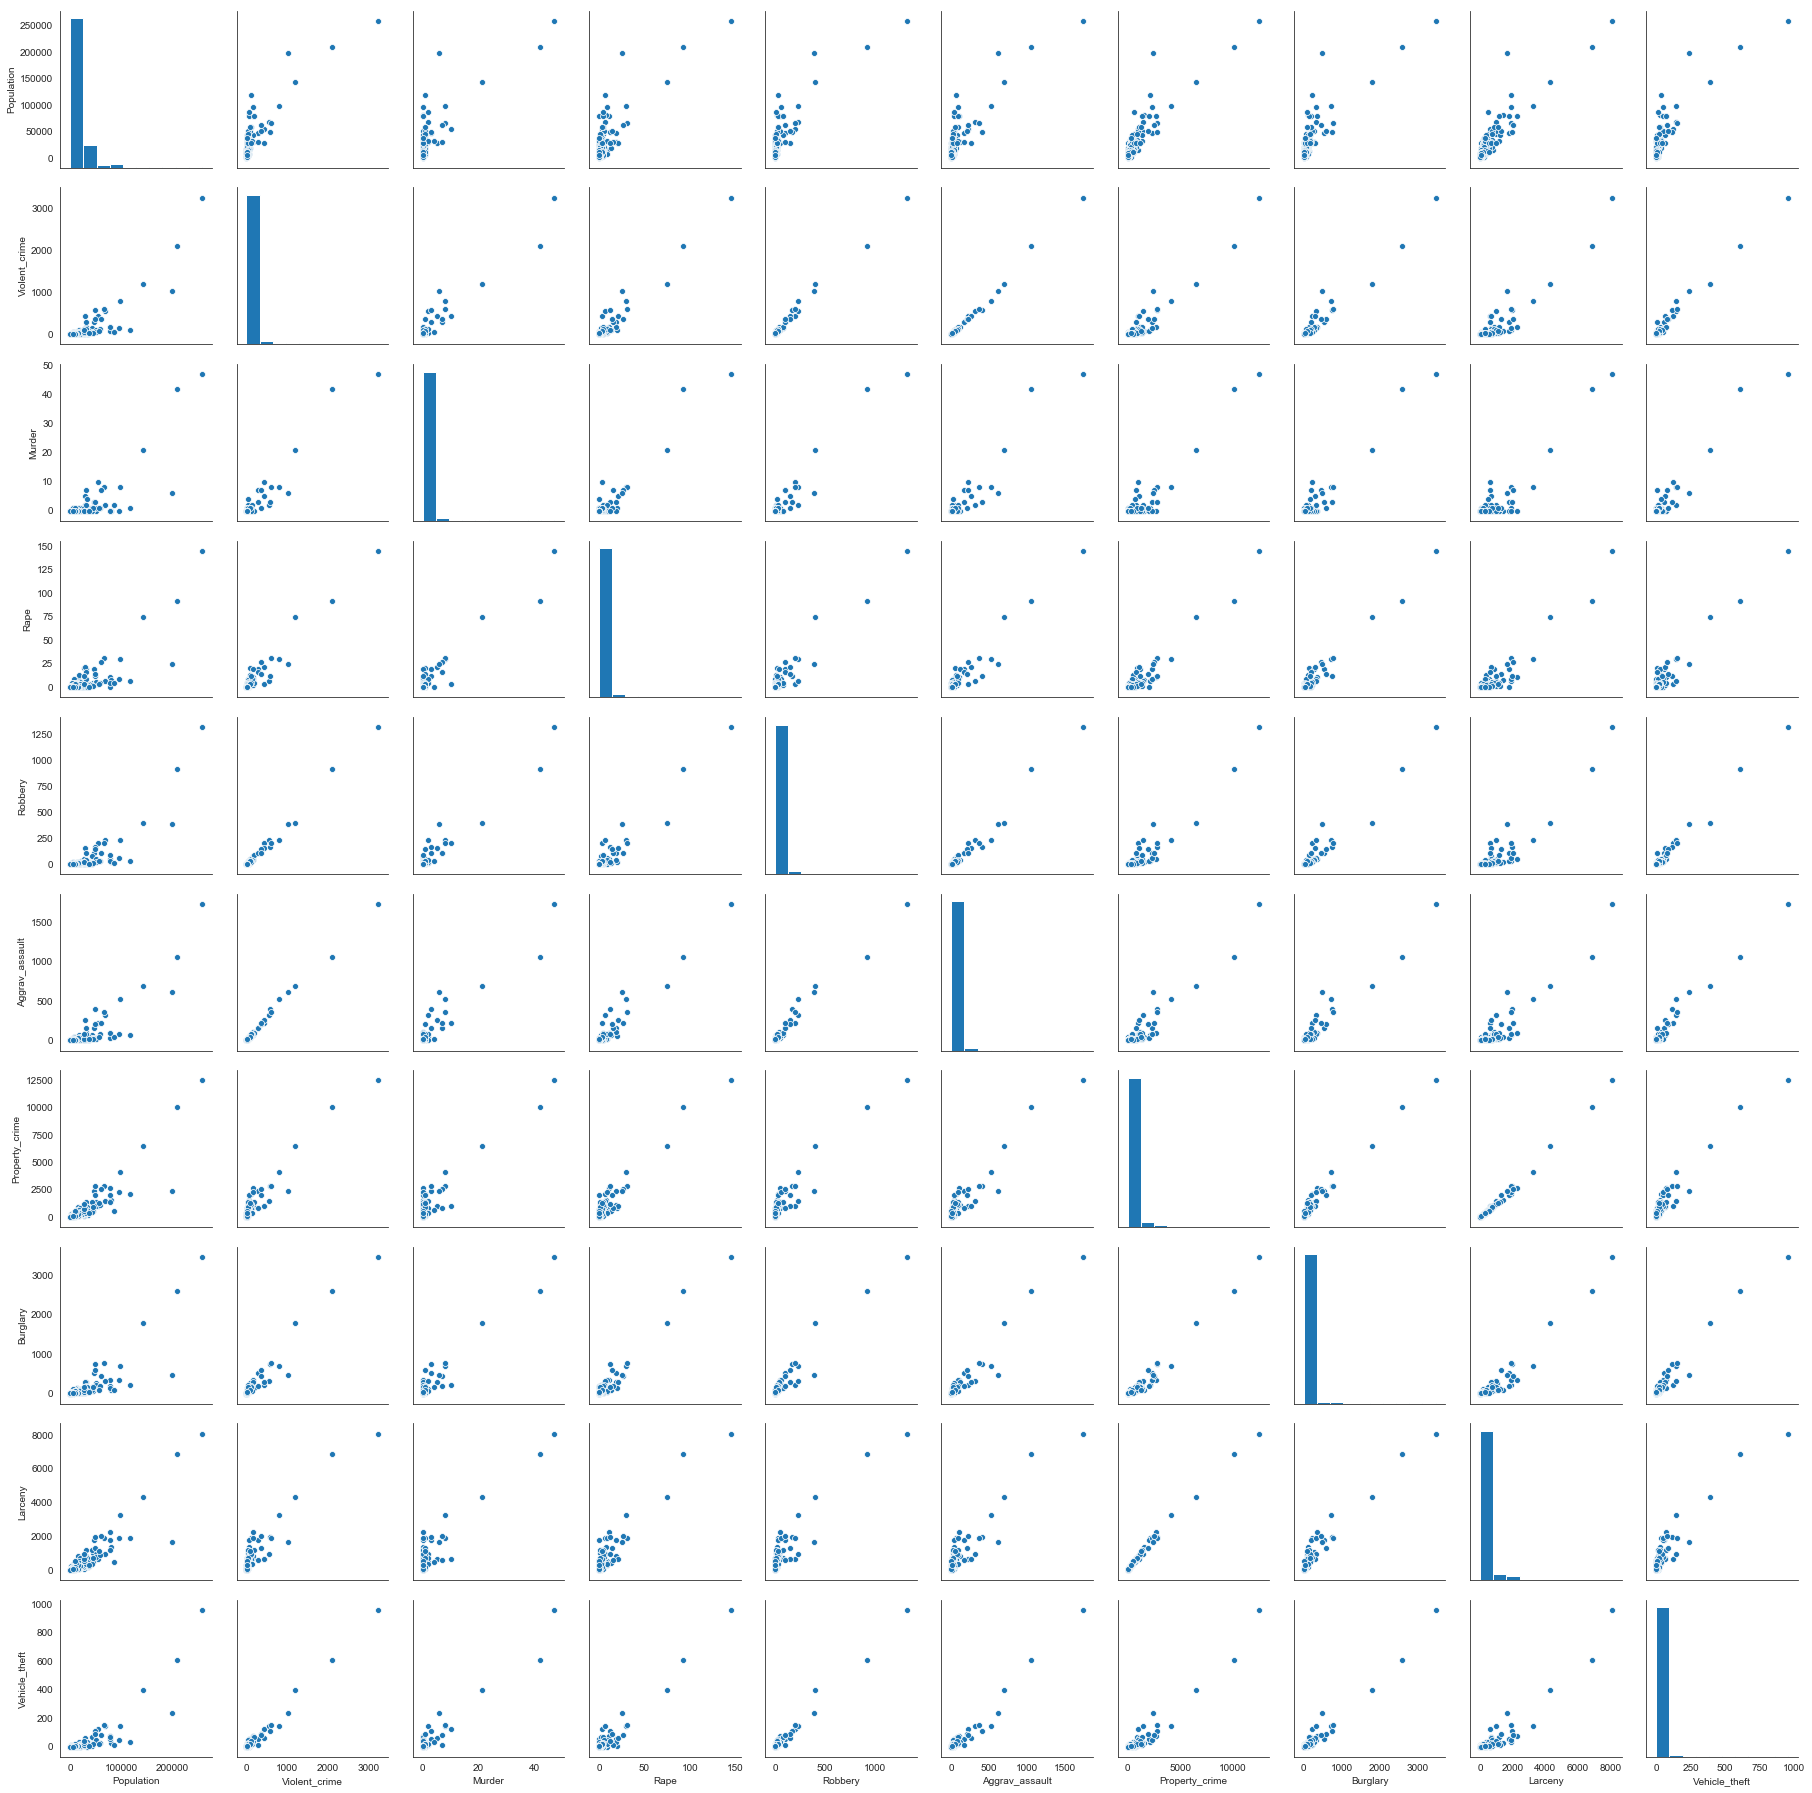

In [6]:
# Build the scatterplot matrix 

sns.pairplot(df)
plt.show()

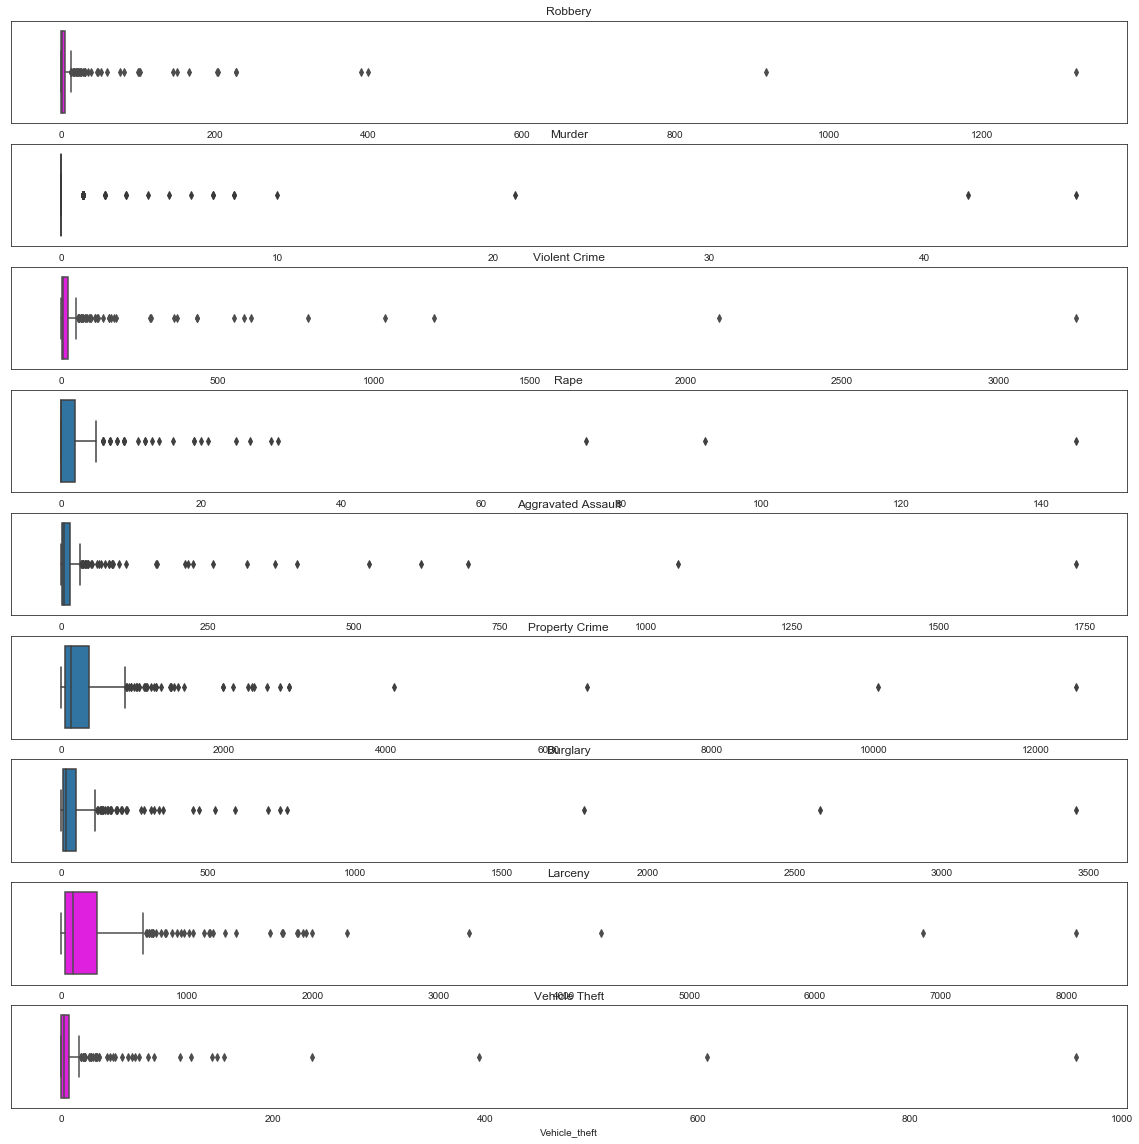

In [7]:
# We have some extreme outliers, let's find where 

# Now let's look for outliers in the rows we'll need: murder and robbery


robbery = df['Robbery']
murder = df['Murder']
vio_crime = df['Violent_crime']
rape = df['Rape']
agg_assault = df['Aggrav_assault']
prop_crime = df['Property_crime']
burglary = df['Burglary']
larceny = df['Larceny']
veh_theft = df['Vehicle_theft']


fig, axes = plt.subplots(9, 1, sharex=False, figsize=(20,20))
# Robbery plot
sns.boxplot(robbery, ax=axes[0], color='fuchsia').set_title('Robbery')    
# Murder plot
sns.boxplot(murder, ax=axes[1], color='m').set_title('Murder')
# Violent Crime plot
sns.boxplot(vio_crime, ax=axes[2], color='fuchsia').set_title('Violent Crime')
# Rape plot
sns.boxplot(rape, ax=axes[3]).set_title('Rape')
# Aggravated assault plot
sns.boxplot(agg_assault, ax=axes[4]).set_title('Aggravated Assault')
# Property crime plot
sns.boxplot(prop_crime, ax=axes[5]).set_title('Property Crime')
# Burglary plot
sns.boxplot(burglary, ax=axes[6]).set_title('Burglary')
# Larceny plot
sns.boxplot(larceny, ax=axes[7], color='fuchsia').set_title('Larceny')
# Vehicle theft plot
sns.boxplot(veh_theft, ax=axes[8], color='fuchsia').set_title('Vehicle Theft')
    

plt.show()

In [8]:
# We windsorize the data to three standard deviations 99.7%

features = pd.DataFrame()

# Robbery
features['robbery_w'] = scipy.stats.mstats.winsorize(df['Robbery'], limits= 0.003)
# Murder
features['murder_w'] = scipy.stats.mstats.winsorize(df['Murder'], limits= 0.003)
# Violent Crime
features['viocrime_w'] = scipy.stats.mstats.winsorize(df['Violent_crime'], limits= 0.003)
# Rape
features['rape_w'] = scipy.stats.mstats.winsorize(df['Rape'], limits= 0.003)
# Aggravated Assault
features['aggass_w'] = scipy.stats.mstats.winsorize(df['Aggrav_assault'], limits= 0.003)
# Property Crime
features['propcrime_w'] = scipy.stats.mstats.winsorize(df['Property_crime'], limits= 0.003)
# Burglary 
features['burglary_w'] = scipy.stats.mstats.winsorize(df['Burglary'], limits= 0.003)
# Larceny
features['larceny_w'] = scipy.stats.mstats.winsorize(df['Larceny'], limits= 0.003)
# Vehicle Theft
features['vehtheft_w'] = scipy.stats.mstats.winsorize(df['Vehicle_theft'], limits= 0.003)

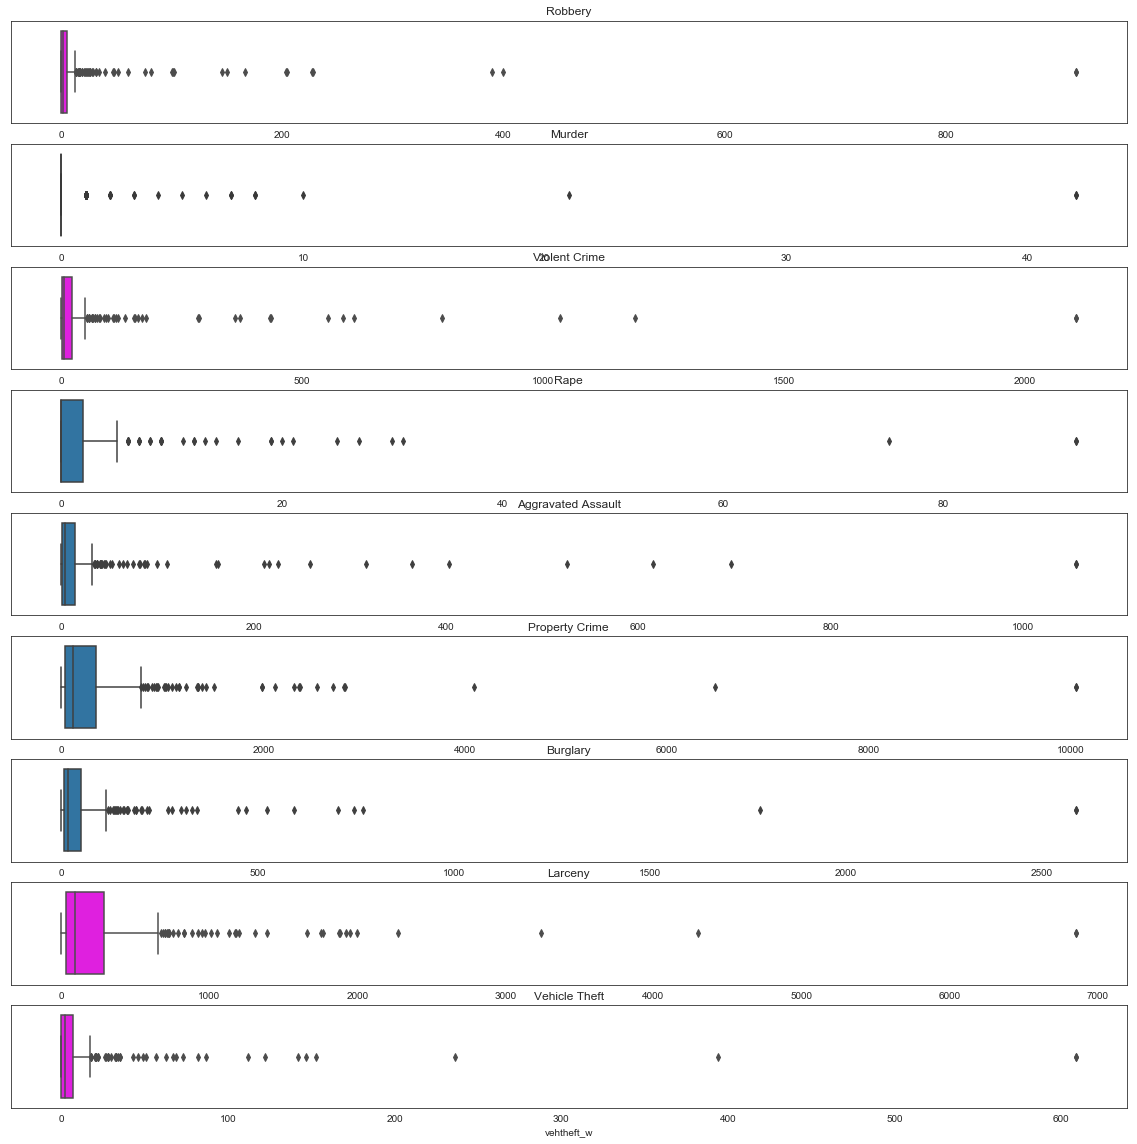

In [9]:
# Plot the windsorized data again

robbery = features['robbery_w']
murder = features['murder_w']
vio_crime = features['viocrime_w']
rape = features['rape_w']
agg_assault = features['aggass_w']
prop_crime = features['propcrime_w']
burglary = features['burglary_w']
larceny = features['larceny_w']
veh_theft = features['vehtheft_w']


fig, axes = plt.subplots(9, 1, sharex=False, figsize=(20,20))
# Robbery plot
sns.boxplot(robbery, ax=axes[0], color='fuchsia').set_title('Robbery')    
# Murder plot
sns.boxplot(murder, ax=axes[1], color='m').set_title('Murder')
# Violent Crime plot
sns.boxplot(vio_crime, ax=axes[2], color='fuchsia').set_title('Violent Crime')
# Rape plot
sns.boxplot(rape, ax=axes[3]).set_title('Rape')
# Aggravated assault plot
sns.boxplot(agg_assault, ax=axes[4]).set_title('Aggravated Assault')
# Property crime plot
sns.boxplot(prop_crime, ax=axes[5]).set_title('Property Crime')
# Burglary plot
sns.boxplot(burglary, ax=axes[6]).set_title('Burglary')
# Larceny plot
sns.boxplot(larceny, ax=axes[7], color='fuchsia').set_title('Larceny')
# Vehicle theft plot
sns.boxplot(veh_theft, ax=axes[8], color='fuchsia').set_title('Vehicle Theft')
plt.show()


In [10]:
# Reset the index so we can copy over the population from our previous dataframe
df, features = [d.reset_index(drop=True) for d in (df, features)]
features['population'] = df['Population']

In [11]:
features['pop_sq'] = features['population'] ** 2

In [12]:
features.head()

,robbery_w,murder_w,viocrime_w,rape_w,aggass_w,propcrime_w,burglary_w,larceny_w,vehtheft_w,population,pop_sq
0,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,1861.000,3463321.000
1,0.000,0.000,3.000,0.000,3.000,24.000,3.000,20.000,1.000,2577.000,6640929.000
2,0.000,0.000,3.000,0.000,3.000,16.000,1.000,15.000,0.000,2846.000,8099716.000
3,227.000,8.000,791.000,30.000,526.000,4090.000,705.000,3243.000,142.000,97956.000,9595377936.000
4,4.000,0.000,23.000,3.000,16.000,223.000,53.000,165.000,5.000,6388.000,40806544.000


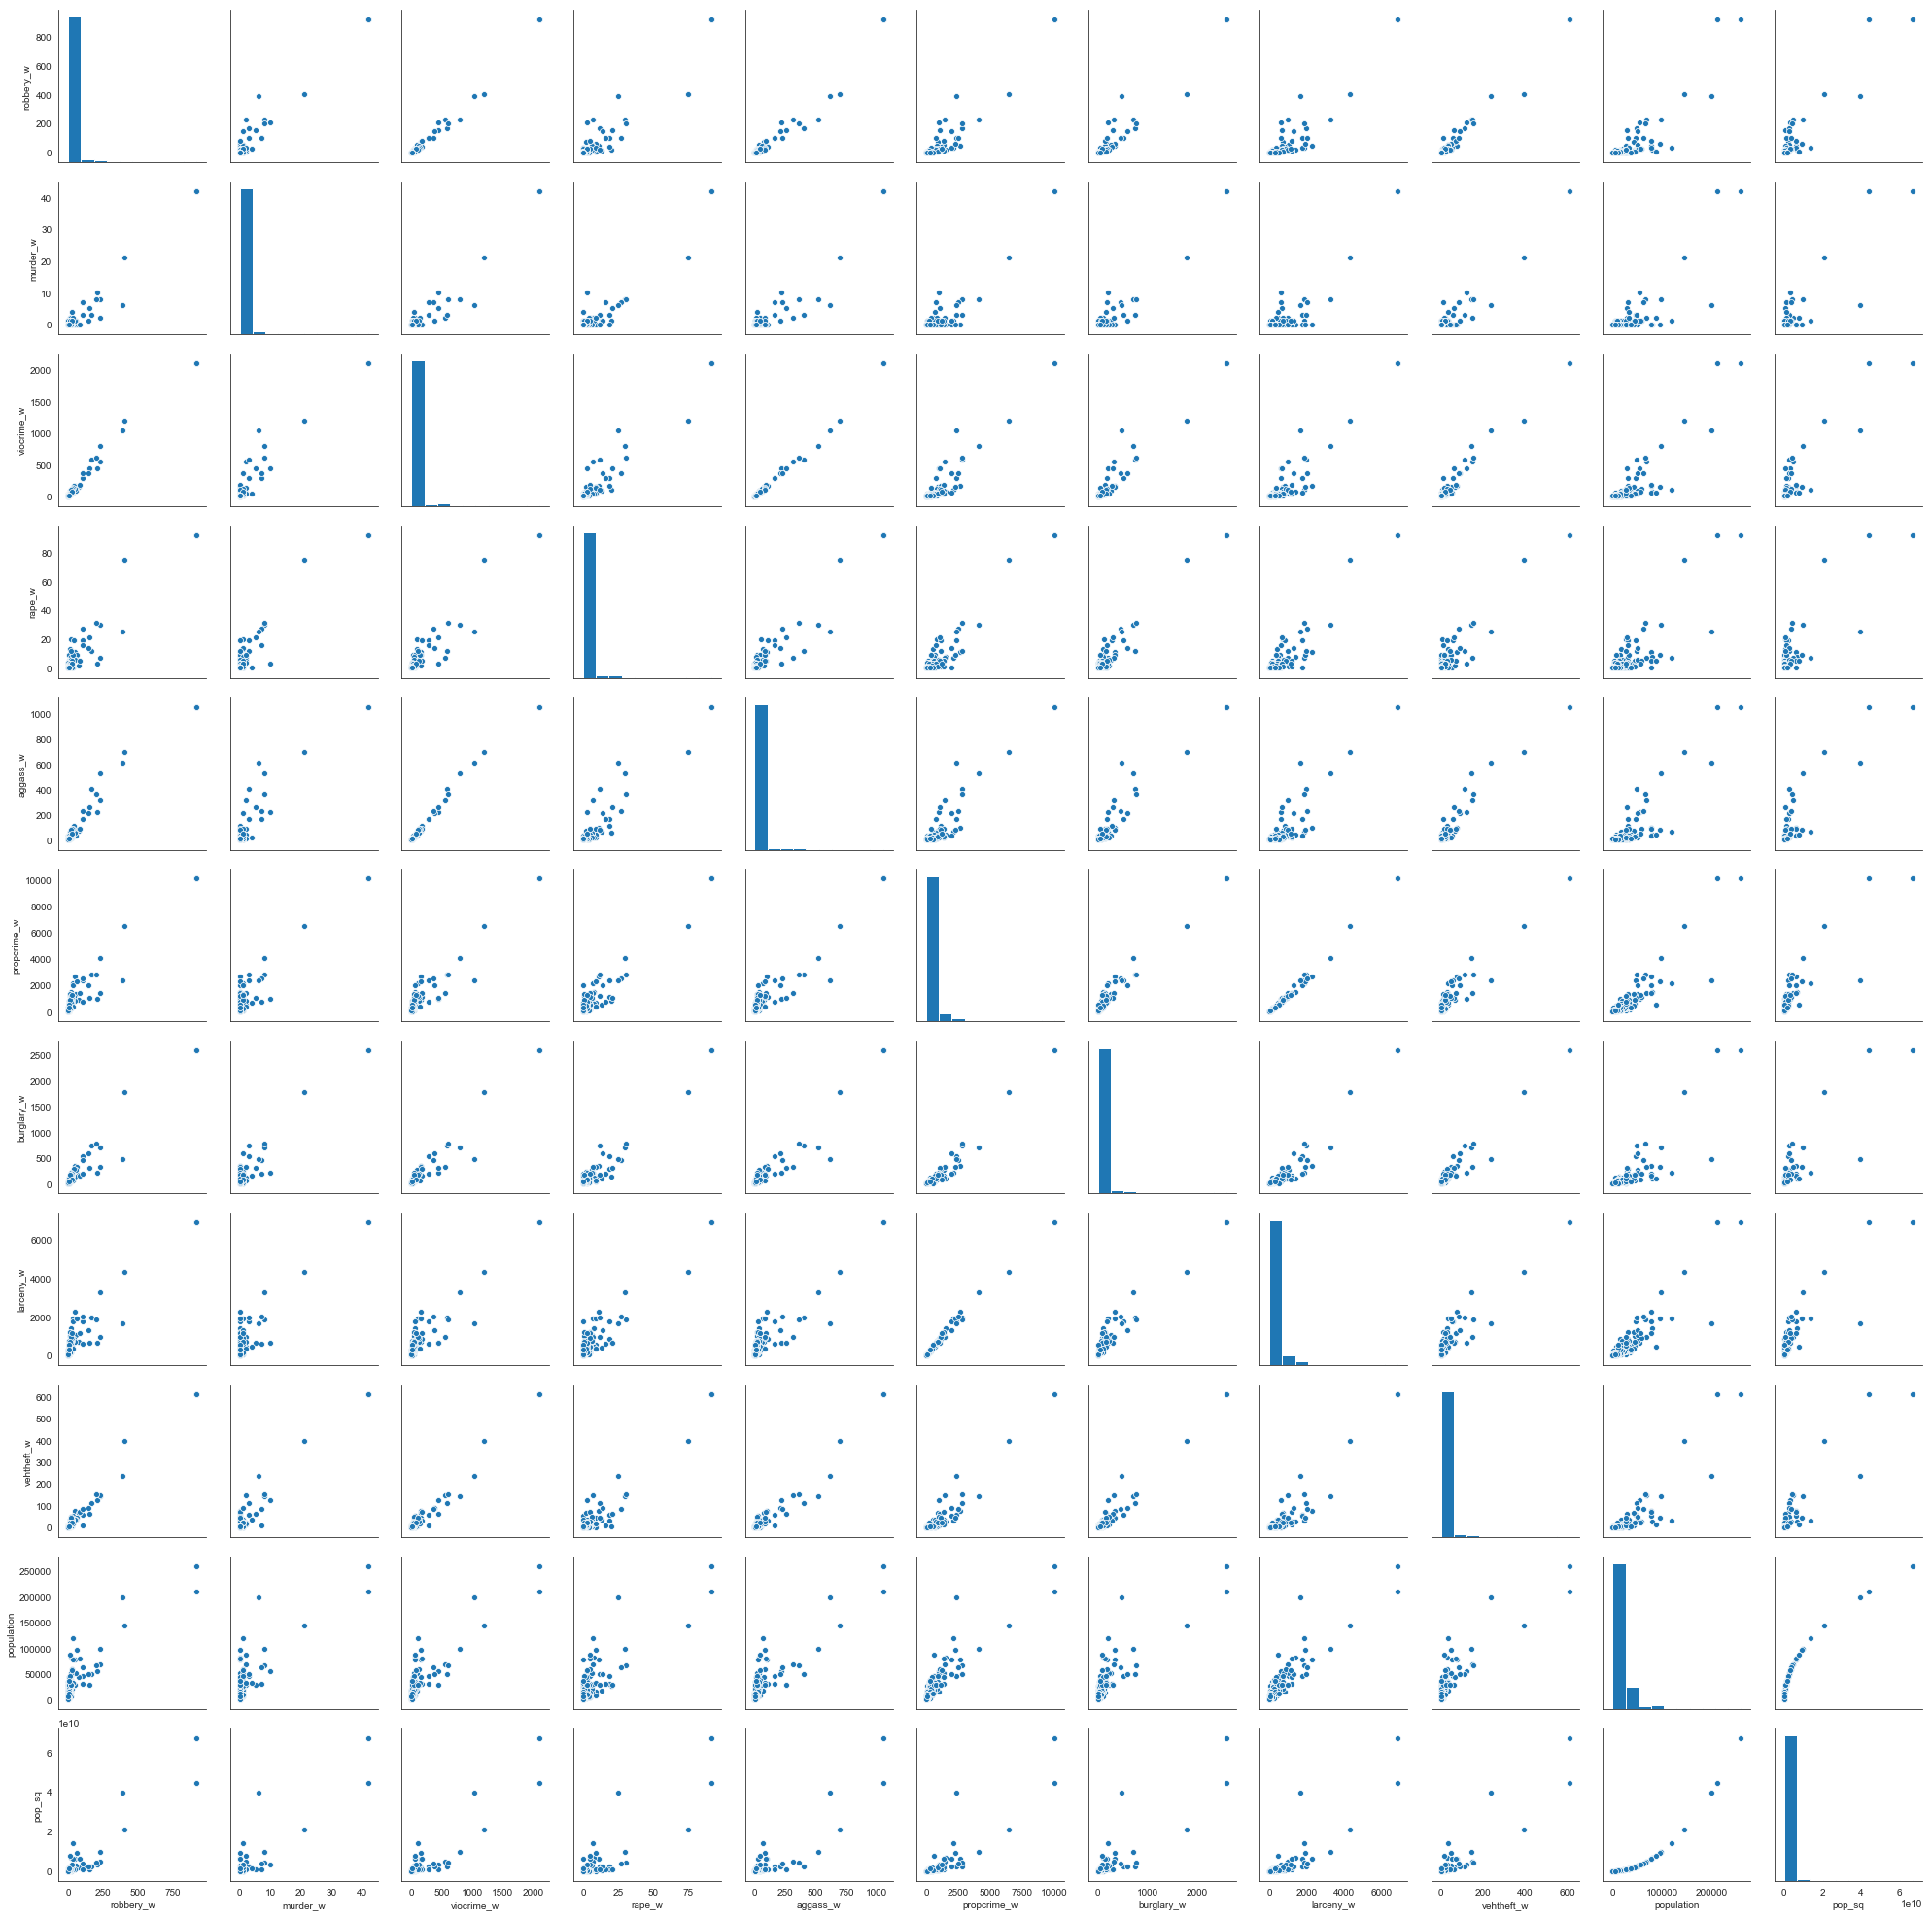

In [13]:
sns.pairplot(features)
plt.show()

There appears to be a high correlation of property crime with larceny, burglary, and possibly a correlation with the others. 

Let's fit it with our linear regression formula $ Property crime = \alpha + Population + Population^2 + Murder + Robbery $

In [14]:
# Fit our model.
regr = linear_model.LinearRegression()
Y = features['propcrime_w']
X = features[['population','pop_sq','murder_w', 'robbery_w']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 2.08681382e-02 -6.35826807e-08  1.21273600e+02  3.75246536e+00]

Intercept: 
 -25.907323488366103

R-squared:
0.9293354463527119


In [22]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

linear_formula = 'propcrime_w ~ population+pop_sq+robbery_w+murder_w'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features).fit()

In [23]:
lm.params

Intercept    -25.907
population     0.021
pop_sq        -0.000
robbery_w      3.752
murder_w     121.274
dtype: float64

In [24]:
lm.pvalues

Intercept    0.170
population   0.000
pop_sq       0.000
robbery_w    0.000
murder_w     0.000
dtype: float64

In [25]:
lm.rsquared

0.9293354463527119